## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Extracción de reglas de pertenencia a grupos

##### Árboles de Decisión

---

En esta libreta se toman los resultados de la clusterización para realizar la extracción de reglas que permitan comprender de qué manera fueron conformados los grupos. 

---

### Carga de librerias a utilizar

In [1]:
# Se importan las librerias a utilizar
import pandas as pd

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

# Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Importación para la exportación a texto de las reglas del árbol
from sklearn.tree import export_text

# Para la visualización de los resultados
import matplotlib.pyplot as plt

### Lectura del dataset generado previamente

In [2]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../../data/final/df_kms_k2.csv', sep=';')
datos.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,nivel_tarjeta_Blue,nivel_tarjeta_Gold,nivel_tarjeta_Platinum,nivel_tarjeta_Silver,cluster
0,22.0,35000.0,3.0,123.0,59000.0,0.59,16.02,1.0,36.0,1088.0,...,False,False,False,True,False,True,False,False,False,0
1,21.0,1000.0,2.0,5.0,9600.0,0.10,11.14,0.0,39.0,1144.0,...,False,False,True,False,False,True,False,False,False,0
2,25.0,5500.0,3.0,1.0,9600.0,0.57,12.87,1.0,44.0,1291.0,...,False,False,False,True,False,True,False,False,False,0
3,23.0,35000.0,2.0,4.0,65500.0,0.53,15.23,1.0,36.0,1887.0,...,False,False,False,True,False,True,False,False,False,0
4,24.0,35000.0,4.0,8.0,54400.0,0.55,14.27,1.0,54.0,1314.0,...,False,False,False,False,False,True,False,False,False,0


### Armado de los sets de entrenamiento y testeo

In [3]:
# Se separan los atributos de datos de los de la etiqueta del dataset

# Ensure the 'cluster' column exists in the DataFrame
if 'cluster' in datos.columns:
    labels = datos['cluster'].astype('str')  # Convert to string
else:
    raise KeyError("The 'cluster' column is missing in the DataFrame.")

features = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'limite_credito_tc', 'operaciones_ult_12m', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO', 'genero_F', 'genero_M',
       'nivel_educativo_DESCONOCIDO', 'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_INCOMPLETO']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: cluster, dtype: object
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,22.0,35000.0,3.0,123.0,59000.0,0.59,16.02,1.0,36.0,1088.0,...,True,False,False,True,False,False,False,False,True,False
1,21.0,1000.0,2.0,5.0,9600.0,0.10,11.14,0.0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
2,25.0,5500.0,3.0,1.0,9600.0,0.57,12.87,1.0,44.0,1291.0,...,True,False,True,False,False,False,False,False,True,False
3,23.0,35000.0,2.0,4.0,65500.0,0.53,15.23,1.0,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
4,24.0,35000.0,4.0,8.0,54400.0,0.55,14.27,1.0,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False


In [4]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,22.0,35000.0,3.0,123.0,59000.0,0.59,16.02,1.0,36.0,1088.0,...,True,False,False,True,False,False,False,False,True,False
1,21.0,1000.0,2.0,5.0,9600.0,0.10,11.14,0.0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
2,25.0,5500.0,3.0,1.0,9600.0,0.57,12.87,1.0,44.0,1291.0,...,True,False,True,False,False,False,False,False,True,False
3,23.0,35000.0,2.0,4.0,65500.0,0.53,15.23,1.0,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
4,24.0,35000.0,4.0,8.0,54400.0,0.55,14.27,1.0,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False


In [6]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [7]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[0]}")
print("-"*50)
print(f"Label del registro: \n{train_labels.iloc[0]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[0]}")
print("-"*50)
print(f"Label del registro: \n{test_labels.iloc[0]}")

Un registro de entrenamiento: 
edad                                           25.0
importe_solicitado                           4000.0
duracion_credito                                2.0
antiguedad_empleado                             6.0
ingresos                                    41664.0
pct_ingreso                                     0.1
tasa_interes                                   5.99
estado_credito                                  0.0
antiguedad_cliente                             45.0
gastos_ult_12m                               4451.0
limite_credito_tc                            1488.0
operaciones_ult_12m                            65.0
personas_a_cargo                                4.0
situacion_vivienda_ALQUILER                   False
situacion_vivienda_HIPOTECA                    True
situacion_vivienda_OTROS                      False
situacion_vivienda_PROPIA                     False
objetivo_credito_EDUCACIÓN                    False
objetivo_credito_INVERSIONES     

In [9]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()
    plt.close()

In [10]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

Se pasa a configurar la serie de experimentos en **mlflow**

In [11]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #1 - Kmeans K=2 Sin normalizar")
mlflow.autolog()

2025/05/14 21:14:23 INFO mlflow.tracking.fluent: Experiment with name 'Reglas - Prueba #1 - Kmeans K=2 Sin normalizar' does not exist. Creating a new experiment.


2025/05/14 21:14:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Árboles de Decisión (TDIDT)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

In [13]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

Rendimiento obtenido: 0.9991011235955056
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2051
           1       0.99      1.00      0.99       174

    accuracy                           1.00      2225
   macro avg       0.99      1.00      1.00      2225
weighted avg       1.00      1.00      1.00      2225

Matriz de confusión:


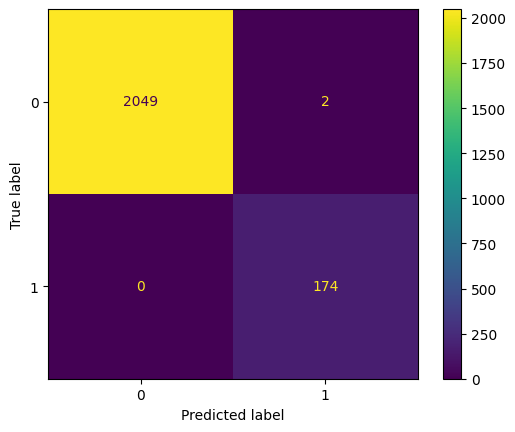

In [15]:
evaluar_modelo(dtc, test_data, test_labels)

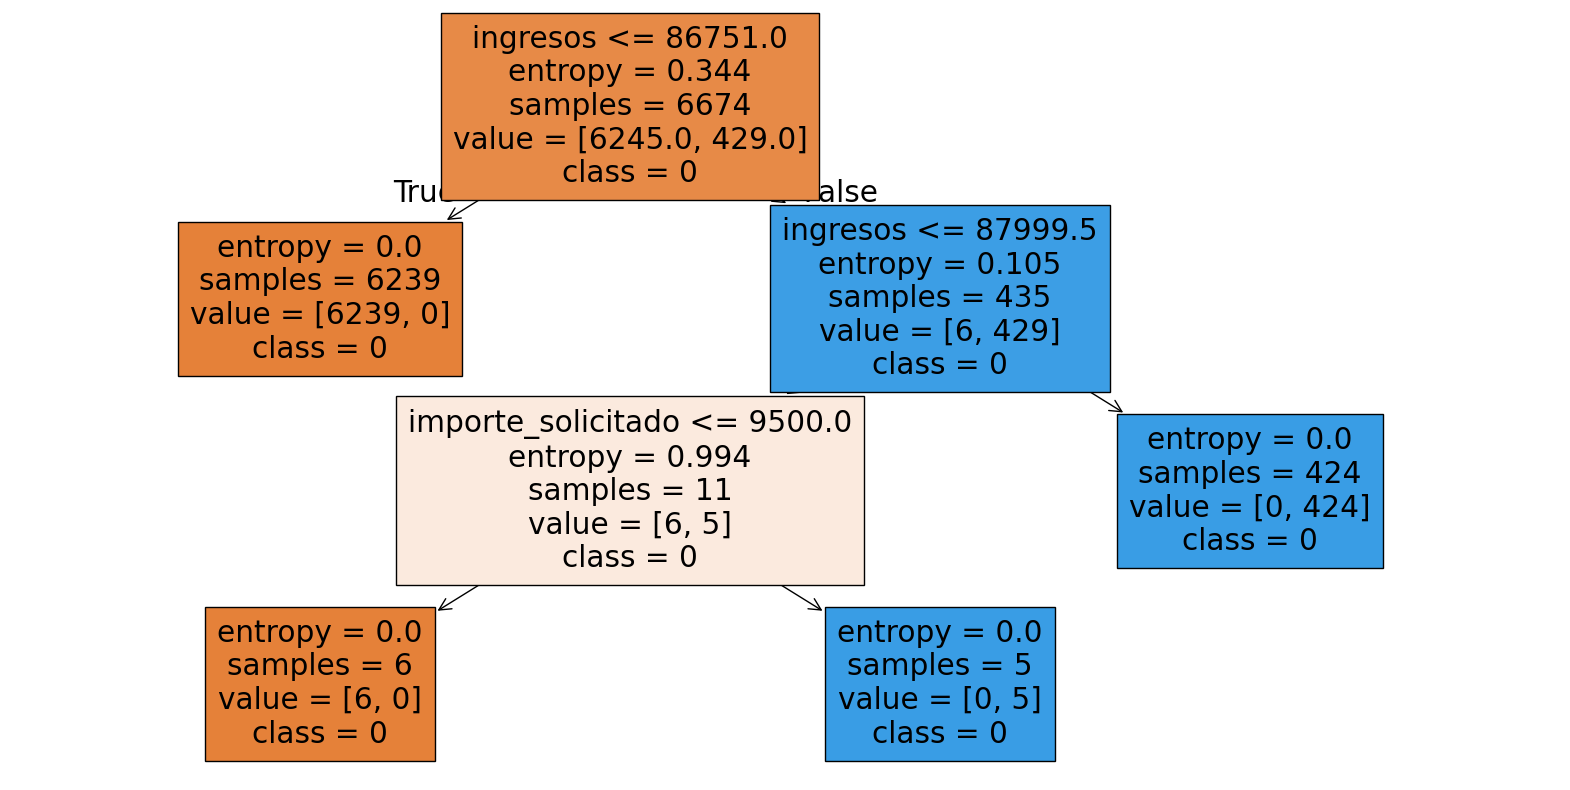

In [16]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

In [17]:
# Exportar las reglas del árbol
rules = export_text(dtc, feature_names=list(data.columns))
print(rules)

|--- ingresos <= 86751.00
|   |--- class: 0
|--- ingresos >  86751.00
|   |--- ingresos <= 87999.50
|   |   |--- importe_solicitado <= 9500.00
|   |   |   |--- class: 0
|   |   |--- importe_solicitado >  9500.00
|   |   |   |--- class: 1
|   |--- ingresos >  87999.50
|   |   |--- class: 1



Prueba #1 - Ejecución #2 con DT (cambiando parámetros)

In [18]:
with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='entropy', 
                                 min_samples_split=5)

    dtc.fit(train_data, train_labels)
    

    # Se finaliza el registro
    mlflow.end_run()

In [19]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

Rendimiento obtenido: 0.9991011235955056
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2051
           1       0.99      1.00      0.99       174

    accuracy                           1.00      2225
   macro avg       0.99      1.00      1.00      2225
weighted avg       1.00      1.00      1.00      2225

Matriz de confusión:


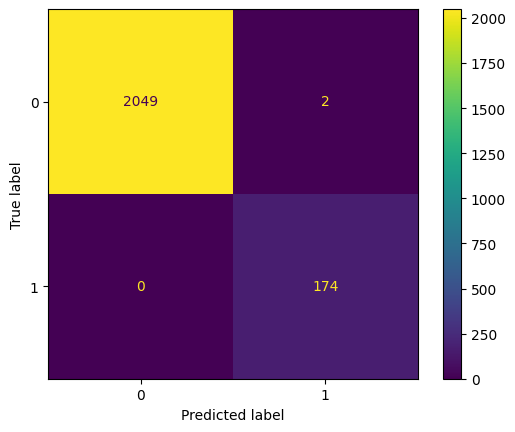

In [20]:
evaluar_modelo(dtc, test_data, test_labels)

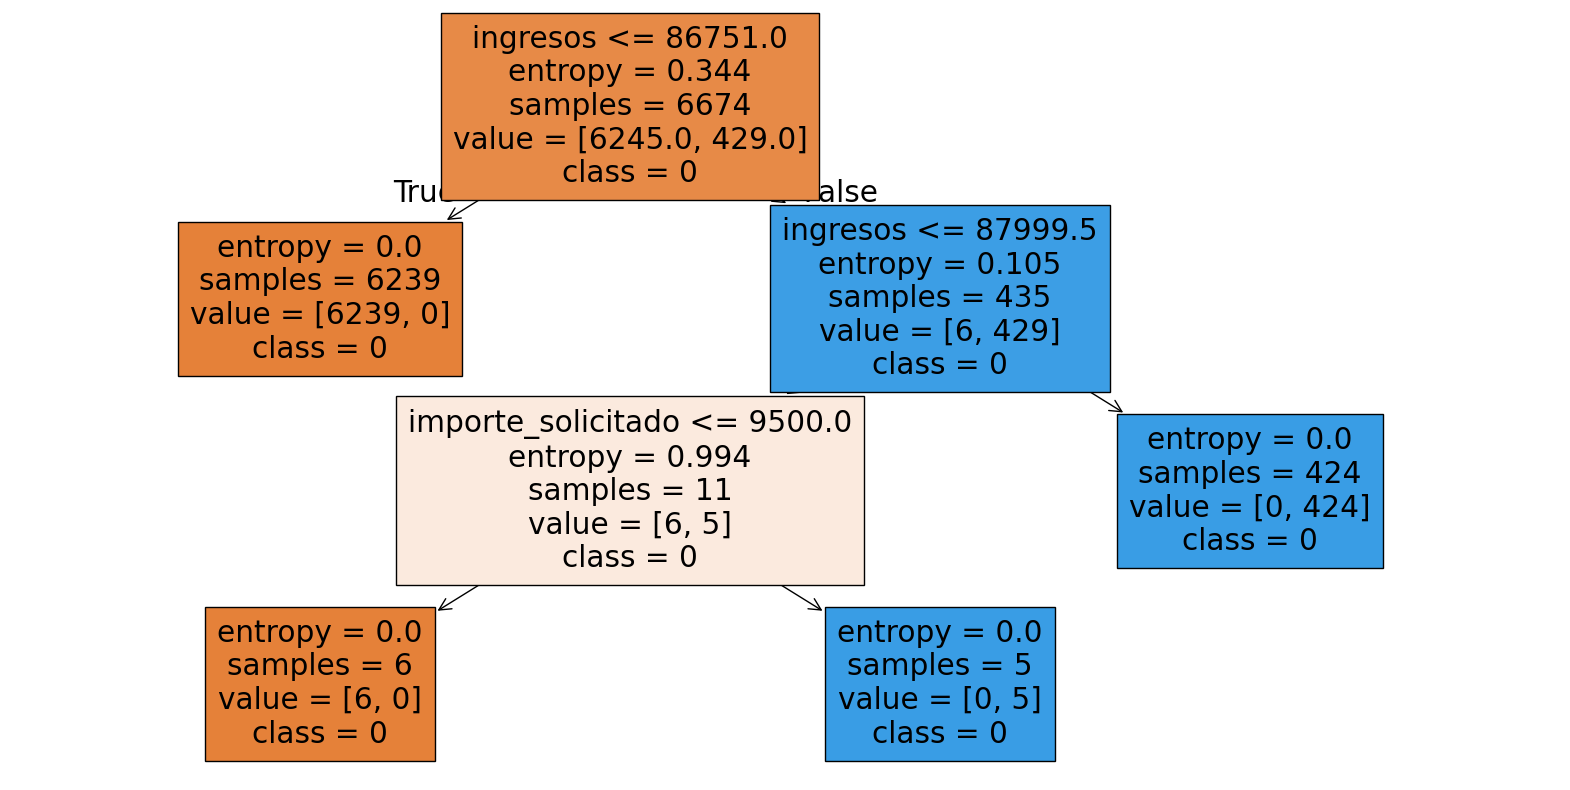

In [21]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

In [22]:
# Exportar las reglas del árbol
rules = export_text(dtc, feature_names=list(data.columns))
print(rules)

|--- ingresos <= 86751.00
|   |--- class: 0
|--- ingresos >  86751.00
|   |--- ingresos <= 87999.50
|   |   |--- importe_solicitado <= 9500.00
|   |   |   |--- class: 0
|   |   |--- importe_solicitado >  9500.00
|   |   |   |--- class: 1
|   |--- ingresos >  87999.50
|   |   |--- class: 1



Prueba #2 - Ejecución #3 - búsqueda de hiperparámetros con validación cruzada

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Divide los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define el espacio de hiperparámetros a buscar
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Configura la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')

# Ajusta el modelo
grid_search.fit(X_train, y_train)

# Muestra los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el modelo optimizado en el conjunto de prueba
y_pred = grid_search.predict(X_test)
print("Precisión en test:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Entrena el modelo final con todos los datos disponibles
final_model = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
final_model.fit(data, labels)

# El modelo final está listo para producción o futuras predicciones


2025/05/14 22:10:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '686b1191859e4504a4a327caa689aa98', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/14 22:10:21 INFO mlflow.sklearn.utils: Logging the 5 best runs, 19 runs will be omitted.
2025/05/14 22:10:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '62b481c3b65c4ae4b325933f757e5736', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}
Precisión en test: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1654
           1       1.00      1.00      1.00       126

    accuracy                           1.00      1780
   macro avg       1.00      1.00      1.00      1780
weighted avg       1.00      1.00      1.00      1780



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=42, splitter='best')

In [46]:
final_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=42, splitter='best')

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2051
           1       1.00      1.00      1.00       174

    accuracy                           1.00      2225
   macro avg       1.00      1.00      1.00      2225
weighted avg       1.00      1.00      1.00      2225

Matriz de confusión:


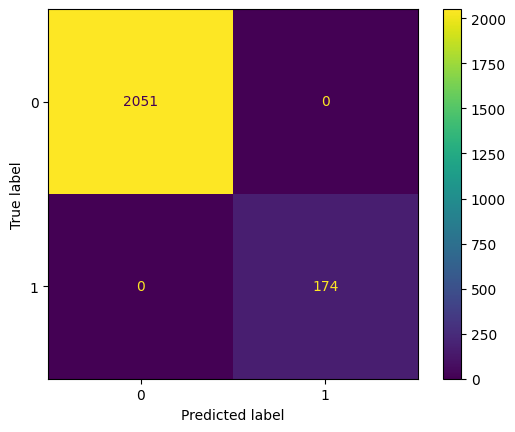

In [47]:
#dtc_corssval = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=5)
#dtc_corssval.fit(train_data, train_labels)

evaluar_modelo(final_model, test_data, test_labels)

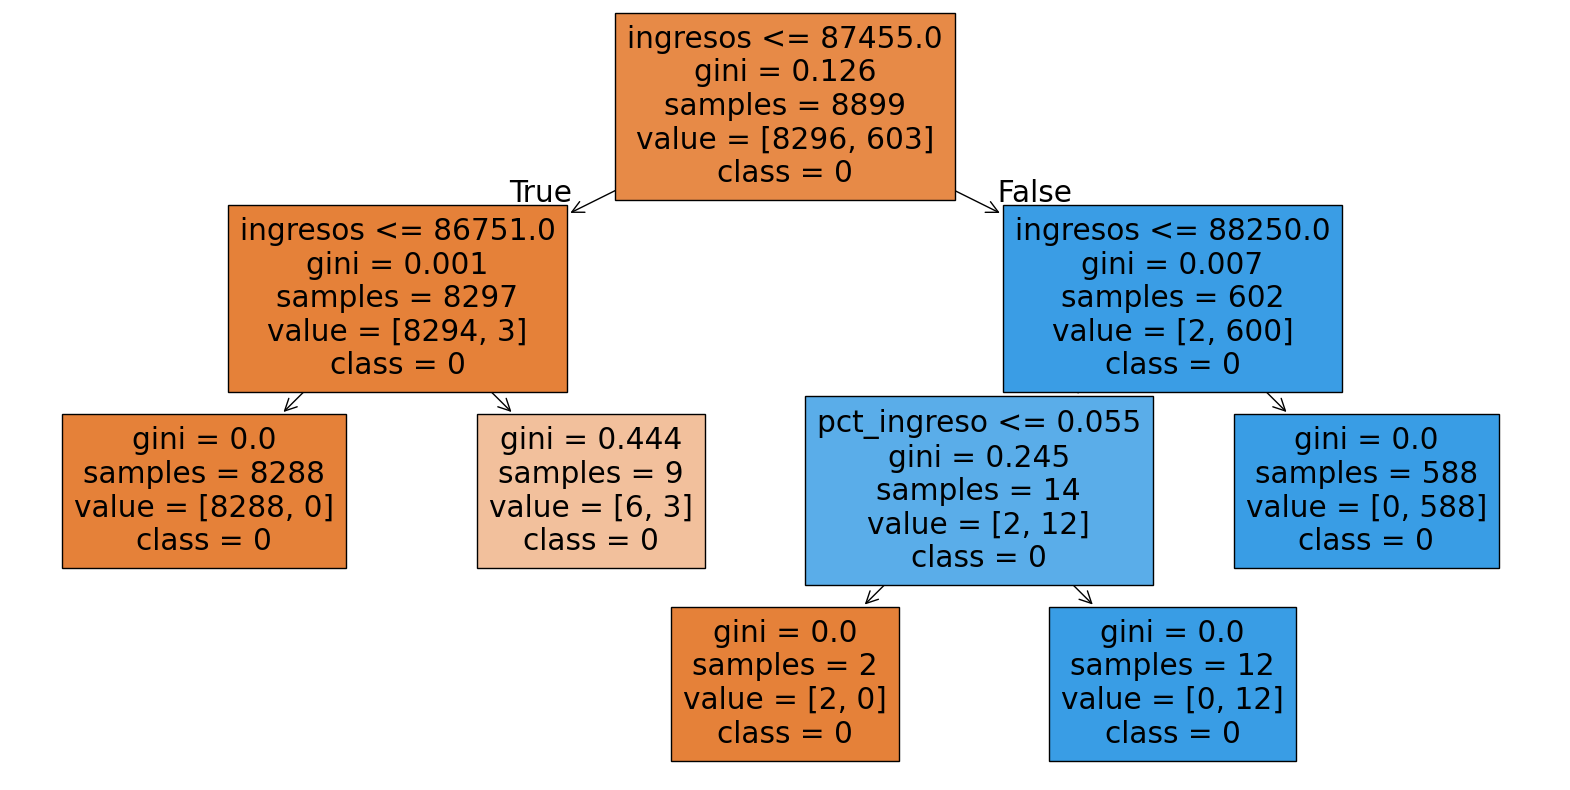

In [48]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(final_model, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

In [49]:
# Exportar las reglas del árbol
rules = export_text(final_model, feature_names=list(data.columns))
print(rules)

|--- ingresos <= 87455.00
|   |--- ingresos <= 86751.00
|   |   |--- class: 0
|   |--- ingresos >  86751.00
|   |   |--- class: 0
|--- ingresos >  87455.00
|   |--- ingresos <= 88250.00
|   |   |--- pct_ingreso <= 0.05
|   |   |   |--- class: 0
|   |   |--- pct_ingreso >  0.05
|   |   |   |--- class: 1
|   |--- ingresos >  88250.00
|   |   |--- class: 1

